# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data
data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [6]:
#make a copy for the original dataset
df_copy=df.copy()

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Missing Values          <br>
2- comma          <br>
3-           <br>

In [7]:
df_copy.isnull()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
223,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,True,True,True,True,False
224,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
225,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df_copy['Net migration']=df_copy['Net migration'].fillna(0)
df_copy['Infant mortality (per 1000 births)']=df_copy['Infant mortality (per 1000 births)'].fillna(0)
df_copy['GDP ($ per capita)']=df_copy['GDP ($ per capita)'].fillna(0)
df_copy['Phones (per 1000)']=df_copy['Phones (per 1000)'].fillna(0)
df_copy['Birthrate']=df_copy['Birthrate'].fillna(0)
df_copy['Deathrate']=df_copy['Deathrate'].fillna(0)


In [9]:
df_copy.isnull()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
223,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
224,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
225,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_copy.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,227.000000
mean,2.874028e+07,5.982270e+05,9647.136564
std,1.178913e+08,1.790282e+06,10047.485847
min,7.026000e+03,2.000000e+00,0.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5500.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


### Another solution for missing values

In [11]:
myround = round(df.isnull().sum(axis=0)*100/df.shape[0],2)
myround.sort_values()

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
GDP ($ per capita)                    0.44
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
Birthrate                             1.32
Phones (per 1000)                     1.76
Deathrate                             1.76
Agriculture                           6.61
Service                               6.61
Industry                              7.05
Literacy (%)                          7.93
Climate                               9.69
dtype: float64

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [12]:
#solution 
df_copy.drop(columns = ['Country','Region','Climate','Literacy (%)','Industry','Service','Agriculture'],inplace = True)
df_copy.dropna(how = 'any',inplace = True)

In [13]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          225 non-null    int64  
 1   Area (sq. mi.)                      225 non-null    int64  
 2   Pop. Density (per sq. mi.)          225 non-null    object 
 3   Coastline (coast/area ratio)        225 non-null    object 
 4   Net migration                       225 non-null    object 
 5   Infant mortality (per 1000 births)  225 non-null    object 
 6   GDP ($ per capita)                  225 non-null    float64
 7   Phones (per 1000)                   225 non-null    object 
 8   Arable (%)                          225 non-null    object 
 9   Crops (%)                           225 non-null    object 
 10  Other (%)                           225 non-null    object 
 11  Birthrate                           225 non-n

In [14]:
df_copy.head(10)

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate
0,31056997,647500,"48,0","0,00","23,06","163,07",700.0,"3,2","12,13","0,22","87,65","46,6","20,34"
1,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"71,2","21,09","4,42","74,49","15,11","5,22"
2,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"78,1","3,22","0,25","96,53","17,14","4,61"
3,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"259,5",10,15,75,"22,46","3,27"
4,71201,468,"152,1","0,00","6,6","4,05",19000.0,"497,2","2,22",0,"97,78","8,71","6,25"
5,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"7,8","2,41","0,24","97,35","45,11","24,2"
6,13477,102,"132,1","59,80","10,76","21,03",8600.0,"460,0",0,0,100,"14,17","5,34"
7,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"549,9","18,18","4,55","77,27","16,93","5,37"
8,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"220,4","12,31","0,48","87,21","16,73","7,55"
9,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"195,7","17,55","2,3","80,15","12,07","8,23"


**Second issue**

In [15]:
#solution 
df_copy = df_copy.loc[:,['Population','Area (sq. mi.)','Pop. Density (per sq. mi.)','Coastline (coast/area ratio)',
                       'Net migration','Infant mortality (per 1000 births)','GDP ($ per capita)','Phones (per 1000)',
                       'Arable (%)','Crops (%)','Other (%)','Birthrate',
                       'Deathrate']].apply(lambda x:x.astype('str').str.replace(",",".").astype('float'))

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          225 non-null    float64
 1   Area (sq. mi.)                      225 non-null    float64
 2   Pop. Density (per sq. mi.)          225 non-null    float64
 3   Coastline (coast/area ratio)        225 non-null    float64
 4   Net migration                       225 non-null    float64
 5   Infant mortality (per 1000 births)  225 non-null    float64
 6   GDP ($ per capita)                  225 non-null    float64
 7   Phones (per 1000)                   225 non-null    float64
 8   Arable (%)                          225 non-null    float64
 9   Crops (%)                           225 non-null    float64
 10  Other (%)                           225 non-null    float64
 11  Birthrate                           225 non-n

In [16]:
#test 
df_copy.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate
0,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,3.2,12.13,0.22,87.65,46.60,20.34
1,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,71.2,21.09,4.42,74.49,15.11,5.22
2,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,78.1,3.22,0.25,96.53,17.14,4.61
3,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,259.5,10.00,15.00,75.00,22.46,3.27
4,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,497.2,2.22,0.00,97.78,8.71,6.25


In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          225 non-null    float64
 1   Area (sq. mi.)                      225 non-null    float64
 2   Pop. Density (per sq. mi.)          225 non-null    float64
 3   Coastline (coast/area ratio)        225 non-null    float64
 4   Net migration                       225 non-null    float64
 5   Infant mortality (per 1000 births)  225 non-null    float64
 6   GDP ($ per capita)                  225 non-null    float64
 7   Phones (per 1000)                   225 non-null    float64
 8   Arable (%)                          225 non-null    float64
 9   Crops (%)                           225 non-null    float64
 10  Other (%)                           225 non-null    float64
 11  Birthrate                           225 non-n

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [18]:
from sklearn import preprocessing

In [19]:
norm = preprocessing.MinMaxScaler()
std_df = norm.fit_transform(df_copy)

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

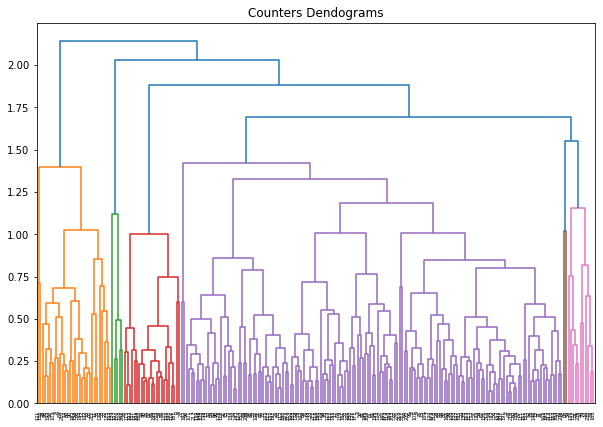

In [20]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=std_df , method="complete",metric="euclidean"),orientation='top')
#fill y with your dataframe
#and method with linkage criteria
#and metric with distance function

# Silhouette_score

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [22]:
#complete linkage
k = 4
a = AgglomerativeClustering(n_clusters = k,linkage='complete')
a.fit(std_df)
label = a.labels_

In [23]:
score = silhouette_score(std_df, label, metric='euclidean')
print(score)

0.16195485161469111


In [24]:
#single linkage
k = 4

a = AgglomerativeClustering(n_clusters = k ,linkage='single')
a.fit(std_df)
label = a.labels_

In [25]:
score = silhouette_score(std_df, label, metric='euclidean')
print(score)

0.3476643374841837


In [26]:
#avg linkage
k = 4
a = AgglomerativeClustering(n_clusters = k ,linkage='average')
a.fit(std_df)
label = a.labels_

In [27]:
score = silhouette_score(std_df, label, metric='euclidean')
print(score)

0.3720412968024492


# ---------------------------------------------------------------------------------------------------

In [28]:
#avg linkage
k=3
p = AgglomerativeClustering(n_clusters = k )
p.fit(std_df)

AgglomerativeClustering(n_clusters=3)

In [29]:
idx = p.labels_
idx

array([1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0,
       2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1,
       1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 1, 1], dtype=int64)

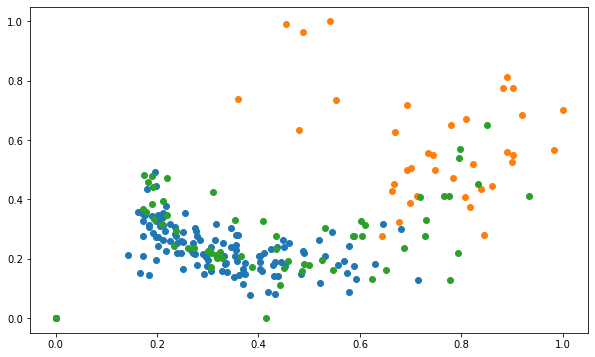

In [30]:
std_df = pd.DataFrame(std_df)
plt.figure(figsize = (10,6))
for i in range(k):
    plt.scatter(std_df.iloc[idx == i,11],std_df.iloc[idx == i,12])

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [45]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(std_df)

In [61]:
principalDf = pd.DataFrame(data = pca_df
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,0.817277,-0.089398
1,-0.039855,0.188106
2,0.052829,-0.260273
3,-0.078081,0.149518
4,-0.388235,-0.390595


In [67]:
k = 4
a = AgglomerativeClustering(n_clusters = k ,linkage='complete')
a.fit(principalDf)
pca = a.labels_

In [68]:
score = silhouette_score(principalDf, pca, metric='euclidean')
print(score)

0.35732390426104216


# -----------------------------------------------------------

In [54]:
finalDf = pd.concat([principalDf,std_df], axis = 1)
finalDf.head()

,principal component 1,principal component 2,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.817277,-0.089398,0.023631,0.037920,0.002950,0.000000,1.000000,0.852921,0.012704,0.003090,0.195299,0.004341,0.814759,0.918589,0.683927
1,-0.039855,0.188106,0.002720,0.001683,0.007658,0.001447,0.364586,0.112558,0.081670,0.068752,0.339559,0.087214,0.617369,0.297851,0.175521
2,0.052829,-0.260273,0.025056,0.139485,0.000848,0.000046,0.467650,0.162142,0.108893,0.075415,0.051844,0.004933,0.947953,0.337867,0.155010
3,-0.078081,0.149518,0.000039,0.000012,0.017847,0.066949,0.006356,0.048486,0.145191,0.250579,0.161005,0.295975,0.625019,0.442736,0.109953
4,-0.388235,-0.390595,0.000049,0.000027,0.009348,0.000000,0.626334,0.021183,0.344828,0.480108,0.035743,0.000000,0.966702,0.171693,0.210155


In [39]:
print( f'variance_ratio: {pca.explained_variance_ratio_}')
print(f'singular_values: {pca.singular_values_}')


variance_ratio: [0.36934199 0.2757642 ]
singular_values: [5.55583417 4.80069235]
